In [48]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_business= pd.read_pickle('./Datasets/business.pkl')
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_business.shape   

(150346, 28)

In [5]:
df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [6]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

- Hay columnas duplicadas

In [7]:
df_business = df_business.loc[:, ~df_business.columns.duplicated()]
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


In [8]:
df_business['state'].value_counts()

state
PA     34039
FL     26329
TN     12056
IN     11246
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2144
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64

- Porcentaje de nulos

In [9]:
#porcentaje de nulos por columna
n_records = len(df_business)
def valores_inexistentes_col(df):
    for columna in df_business:
        print("{} | {} | {}".format(
            df_business[columna].name, len(df_business[df_business[columna].isnull()]) / (1.0*n_records), df_business[columna].dtype
        ))

valores_inexistentes_col(df_business)

business_id | 0.0 | object
name | 0.0 | object
address | 0.0 | object
city | 0.0 | object
state | 1.9953972835991645e-05 | object
postal_code | 0.0 | object
latitude | 0.0 | object
longitude | 0.0 | object
stars | 0.0 | object
review_count | 0.0 | object
is_open | 0.0 | object
attributes | 0.0914158008859564 | object
categories | 0.0006850864007023798 | object
hours | 0.15446370372341134 | object


In [10]:
df_business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None


In [11]:
df_business.categories.value_counts()

categories
Beauty & Spas, Nail Salons                                                                                       1012
Restaurants, Pizza                                                                                                935
Nail Salons, Beauty & Spas                                                                                        934
Pizza, Restaurants                                                                                                823
Restaurants, Mexican                                                                                              728
                                                                                                                 ... 
Dermatologists, Health & Medical, Cosmetic Surgeons, Doctors, Acne Treatment, Skin Care, Beauty & Spas              1
Home Services, Home & Garden, Nurseries & Gardening, Hardware Stores, Shopping, Building Supplies, Appliances       1
Food Trucks, Smokehouse, Restaurants, Food, B

In [12]:
duplicados = df_business['categories'].duplicated().sum()
print("Cantidad de duplicados en 'categories':", duplicados)

Cantidad de duplicados en 'categories': 67185


In [13]:
df_business = df_business.dropna(subset=['categories'])

In [14]:
filtrado= df_business[df_business['state']=='CA']
filtrado['categories'].value_counts()

categories
Restaurants, Pizza                                                                                                                                       40
Beauty & Spas, Nail Salons                                                                                                                               39
Restaurants, Mexican                                                                                                                                     31
Pizza, Restaurants                                                                                                                                       28
Nail Salons, Beauty & Spas                                                                                                                               26
                                                                                                                                                         ..
Home & Garden, Shopping, Rugs, Mattresses, Furniture 

- Filtramos por categoria que contenga restaurants y que sean del estado de california

In [15]:
df_restaurantes= df_business[df_business['categories'].str.lower().str.contains('restaurant')].reset_index(drop=True)
df_restaurantes_CA= df_restaurantes[df_restaurantes['state'].str.lower().str.startswith('ca')].reset_index(drop=True)

In [16]:
df_restaurantes_CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   1814 non-null   object
 1   name          1814 non-null   object
 2   address       1814 non-null   object
 3   city          1814 non-null   object
 4   state         1814 non-null   object
 5   postal_code   1814 non-null   object
 6   latitude      1814 non-null   object
 7   longitude     1814 non-null   object
 8   stars         1814 non-null   object
 9   review_count  1814 non-null   object
 10  is_open       1814 non-null   object
 11  attributes    1788 non-null   object
 12  categories    1814 non-null   object
 13  hours         1568 non-null   object
dtypes: object(14)
memory usage: 198.5+ KB


In [17]:
df_restaurantes_CA.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,CA,37188,36.464747,-86.659187,3.5,8,1,{'RestaurantsPriceRange2': '1'},"Pizza, Chicken Wings, Sandwiches, Restaurants","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
2,LhpPSrulqVeTyJeK2xydvQ,Fresh Fruits & Salads,114 N 3rd St,Camden,CA,08102,39.94669,-75.123327,4.5,6,1,"{'BusinessParking': '{'garage': False, 'street...","Juice Bars & Smoothies, Restaurants, Fruits & ...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
3,8c0r7olQSYGcws0bTd3ikw,Zesty Tsunami,6614 Osteen Rd,New Port Richey,CA,34653,28.250218,-82.682441,4.0,5,0,"{'RestaurantsReservations': 'False', 'Restaura...","Hawaiian, Food, Food Trucks, Street Vendors, R...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
4,QWqKTWQ2OiDgo3dzNkpung,Jong Ka Jib,6600 N 5th St,Philadelphia,CA,19126,40.052064,-75.127394,4.5,351,1,"{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...","Korean, Restaurants","{'Monday': '10:30-22:30', 'Tuesday': '10:30-22..."


In [18]:
df_restaurantes_CA= df_restaurantes_CA[df_restaurantes_CA['is_open']==1].reset_index(drop=True)

In [19]:
df_restaurantes_CA.drop(columns=['is_open','state'], inplace=True)

In [20]:
df_restaurantes_CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   1215 non-null   object
 1   name          1215 non-null   object
 2   address       1215 non-null   object
 3   city          1215 non-null   object
 4   postal_code   1215 non-null   object
 5   latitude      1215 non-null   object
 6   longitude     1215 non-null   object
 7   stars         1215 non-null   object
 8   review_count  1215 non-null   object
 9   attributes    1196 non-null   object
 10  categories    1215 non-null   object
 11  hours         1105 non-null   object
dtypes: object(12)
memory usage: 114.0+ KB


In [21]:
df_restaurantes_CA.categories.value_counts()

categories
Restaurants, Pizza                                                                     31
Chinese, Restaurants                                                                   20
Restaurants, Mexican                                                                   19
Pizza, Restaurants                                                                     16
Restaurants, Chinese                                                                   15
                                                                                       ..
Mexican, Restaurants, Fast Food                                                         1
Gluten-Free, Restaurants, Pizza, Specialty Food, Pasta Shops, Italian, Food             1
Fast Food, Chicken Wings, Salad, Restaurants                                            1
Chinese, Food, Ethnic Food, Kebab, Barbeque, Restaurants, Mongolian, Specialty Food     1
Restaurants, Specialty Food, Food, Sandwiches, Italian                                  1

In [22]:
categorias_unicas = df_restaurantes_CA['categories'].unique()
for categoria in categorias_unicas:
    print(categoria)

Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries
Pizza, Chicken Wings, Sandwiches, Restaurants
Juice Bars & Smoothies, Restaurants, Fruits & Veggies, Salad, Specialty Food, Food
Korean, Restaurants
Delis, Convenience Stores, Restaurants, Food, Coffee & Tea, Sandwiches
Bars, Beer Bar, American (Traditional), Nightlife, Pubs, Burgers, Restaurants
Diners, Restaurants, Sandwiches, Breakfast & Brunch, Vegetarian
Restaurants, Breakfast & Brunch, Steakhouses, Sandwiches
Chinese, Restaurants
Restaurants, Cajun/Creole, Seafood, Southern
Restaurants, Mexican, Fast Food, Tex-Mex
Sandwiches, Food, Donuts, Restaurants, Juice Bars & Smoothies
Fast Food, Restaurants, Hot Dogs, Burgers
Chinese, Noodles, Seafood, Chicken Wings, Restaurants
Laotian, American (Traditional), Asian Fusion, Salad, Pan Asian, Sushi Bars, Food Trucks, Food, Noodles, Restaurants, Thai
Cheesesteaks, Chicken Wings, Restaurants, Pizza
Pizza, Restaurants
Chinese, Fast Food, Restaurants
Restaurants, Salad, Vegetarian
Bars, Sal

In [23]:
categorias_interes = ['mexican',
                      'Restaurants, Cuban',
                      'Restaurants, Peruvian',
                      'Restaurants, Brazilian',
                      'Restaurants, Venezuelan',
                      'Restaurants, Colombian',
                      'Restaurants, Argentinian',
                      'Restaurants, Puerto Rican',
                      'Restaurants, Chilean',
                      'Restaurants, Salvadoran',
                      'Restaurants, Dominican',
                      'Restaurants, Spanish',
                      'Restaurants, Desserts, Bars, Nightlife, Food, Latin American, Wine Bars, Cocktail Bars, American (New)'
                      'Restaurants, Mexican, Fast Food, Tex-Mex',
                      'Restaurants, Mexican',
                      'Restaurants, Caribbean',
                      'Restaurants, Tacos, Mexican, Hot Dogs, Breakfast & Brunch, Steakhouses',
                      'Restaurants, Mexican, Tacos, Tex-Mex, Fast Food, Breakfast & Brunch',
                      'Restaurants, Latin American',
                      'Restaurants, Mexican, Tacos, Tex-Mex, Fast Food, Breakfast & Brunch',
                      'Restaurants, Mexican, Tacos',
                      'Restaurants, Mexican, Fast Food, Breakfast & Brunch',
                      'Restaurants, Mexican, Tacos, Food Trucks, Food, Latin American',
                      'Restaurants, Latin American, Food Trucks, Mexican, Tex-Mex, Tacos, Food',
                      'Mex',
                      'Tacos',
                      'Latin American',
                      'Tex-Mex',
                      'Mexican'  
                      ]

# Convertir la columna 'categories' a minúsculas y realizar la búsqueda para cada palabra clave
condiciones = [df_restaurantes_CA['categories'].str.lower().str.contains(palabra.lower()) for palabra in categorias_interes]

# Aplicar la lógica OR a las condiciones para obtener el DataFrame filtrado
df_filtrado = df_restaurantes_CA[pd.concat(condiciones, axis=1).any(axis=1)]

# Imprimir el DataFrame filtrado
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 10 to 1202
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   119 non-null    object
 1   name          119 non-null    object
 2   address       119 non-null    object
 3   city          119 non-null    object
 4   postal_code   119 non-null    object
 5   latitude      119 non-null    object
 6   longitude     119 non-null    object
 7   stars         119 non-null    object
 8   review_count  119 non-null    object
 9   attributes    115 non-null    object
 10  categories    119 non-null    object
 11  hours         109 non-null    object
dtypes: object(12)
memory usage: 12.1+ KB


In [24]:
categorias_unicas = df_filtrado['categories'].unique()
for categoria in categorias_unicas:
    print(categoria)

Restaurants, Mexican, Fast Food, Tex-Mex
Fast Food, Restaurants, Mexican
Restaurants, Mexican
Food Trucks, Mexican, Restaurants, Tacos, Food
Mexican, Arts & Entertainment, Festivals, Restaurants, Religious Organizations, Churches
Restaurants, Tacos, Mexican, Hot Dogs, Breakfast & Brunch, Steakhouses
Mexican, Food, Event Planning & Services, Breakfast & Brunch, Beer, Wine & Spirits, Personal Chefs, Restaurants, Tacos
Restaurants, Food Trucks, Mexican, Tex-Mex, Tacos, Food, Latin American
Mexican, Restaurants, Pizza
Mexican, Restaurants, Cafes, Breakfast & Brunch, Italian
Latin American, Restaurants, Venezuelan
Mexican, Tex-Mex, Restaurants, Barbeque
Latin American, Colombian, Restaurants
Restaurants, Mexican, Tacos, Tex-Mex, Fast Food, Breakfast & Brunch
Food, Restaurants, American (Traditional), Mexican, Tex-Mex, Food Trucks, Tacos
Restaurants, Fast Food, Breakfast & Brunch, Tex-Mex, Mexican, Tacos
Restaurants, Desserts, Bars, Nightlife, Food, Latin American, Wine Bars, Cocktail Bars, 

In [25]:
df_filtrado.reset_index(drop=True, inplace=True)
df_filtrado.shape

(119, 12)

In [26]:
df_filtrado = df_filtrado.copy()
df_filtrado.drop(columns=['hours'], inplace=True)

In [27]:
len(df_filtrado['name'].unique())

99

In [28]:
df_filtrado.head()

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,attributes,categories
0,du_yelFmWOZDEyIAE-jdsQ,Taco Del Mar,"1515-Poydras St, Ste 160",New Orleans,70112,29.952248,-90.078264,2.0,9,"{'Alcohol': 'u'none'', 'RestaurantsTakeOut': '...","Restaurants, Mexican, Fast Food, Tex-Mex"
1,k9A4tAmei12tLprkrNPkcg,El Pollo Loco,10320 N Mccarran Blvd,Reno,89503,39.532104,-119.864028,3.5,54,"{'Alcohol': 'u'none'', 'RestaurantsPriceRange2...","Fast Food, Restaurants, Mexican"
2,ERl6OCSEIFBOqfjai_jIUg,La Parrilla Suiza,2720 N Oracle Rd,Tucson,85705,32.25642,-110.97746,3.0,125,"{'WiFi': 'u'free'', 'RestaurantsReservations':...","Restaurants, Mexican"
3,VaPj2Mpu0IpsUoisyTCAUg,That Awesome Taco Truck,,Nashville,37206,36.180519,-86.726548,3.5,11,"{'Alcohol': 'u'none'', 'RestaurantsTableServic...","Food Trucks, Mexican, Restaurants, Tacos, Food"
4,Qi-A4ZgcEuSnq_8Fpfo_3Q,Our Lady of Guadalupe Mercado,227 N Nopal St,Santa Barbara,93103,34.42308,-119.684008,4.5,8,"{'NoiseLevel': 'u'very_loud'', 'Alcohol': 'u'b...","Mexican, Arts & Entertainment, Festivals, Rest..."


In [29]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   119 non-null    object
 1   name          119 non-null    object
 2   address       119 non-null    object
 3   city          119 non-null    object
 4   postal_code   119 non-null    object
 5   latitude      119 non-null    object
 6   longitude     119 non-null    object
 7   stars         119 non-null    object
 8   review_count  119 non-null    object
 9   attributes    115 non-null    object
 10  categories    119 non-null    object
dtypes: object(11)
memory usage: 10.4+ KB


- 119 restaurantes latinoamericanos activos en California

In [31]:
len(df_filtrado['business_id'].unique())

119

In [ ]:
#procesar atributos

## EDA

In [85]:
df_filtrado.head(1)

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,attributes,categories
0,du_yelFmWOZDEyIAE-jdsQ,Taco Del Mar,"1515-Poydras St, Ste 160",New Orleans,70112,29.952248,-90.078264,2.0,9,"{'Alcohol': 'u'none'', 'RestaurantsTakeOut': '...","Restaurants, Mexican, Fast Food, Tex-Mex"


In [34]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   119 non-null    object
 1   name          119 non-null    object
 2   address       119 non-null    object
 3   city          119 non-null    object
 4   postal_code   119 non-null    object
 5   latitude      119 non-null    object
 6   longitude     119 non-null    object
 7   stars         119 non-null    object
 8   review_count  119 non-null    object
 9   attributes    115 non-null    object
 10  categories    119 non-null    object
dtypes: object(11)
memory usage: 10.4+ KB


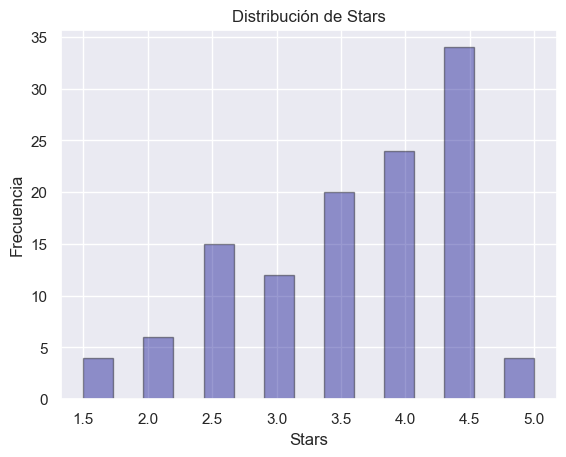

In [89]:
df_filtrado['stars'] = df_filtrado['stars'].astype(float)
sns.distplot(df_filtrado['stars'], bins=15, kde=False, color='darkblue', hist_kws={'edgecolor':'black'})

plt.title('Distribución de Stars')
plt.xlabel('Stars')
plt.ylabel('Frecuencia')
plt.show()

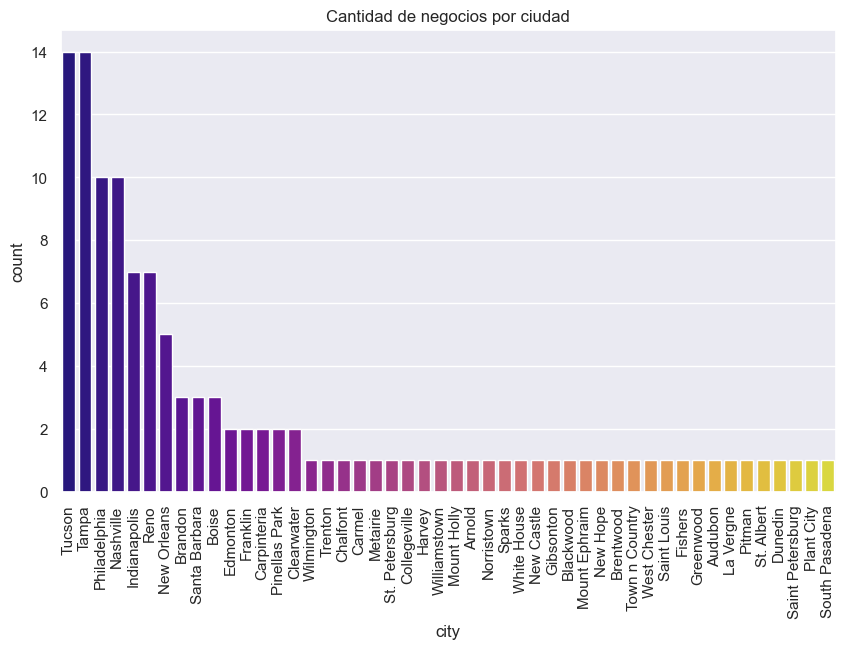

In [61]:
plt.figure(figsize=(10, 6))  
sns.set(style="darkgrid")  
sns.countplot(data=df_filtrado, x='city', palette='plasma', order=df_filtrado['city'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cantidad de negocios por ciudad')
plt.show()

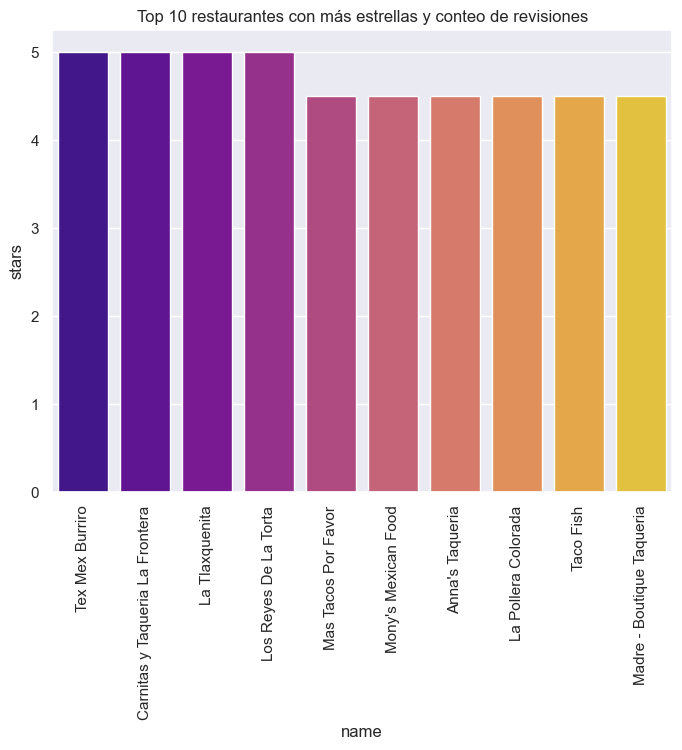

In [77]:
df_filtrado['review_count'] = df_filtrado['review_count'].astype(int)
df_sorted = df_filtrado.sort_values(by=['stars', 'review_count'], ascending=False)


top_restaurants = df_sorted.head(10)

plt.figure(figsize=(8, 6))
sns.barplot(data=top_restaurants, x='name', y='stars', palette='plasma')
plt.xticks(rotation=90)
plt.title('Top 10 restaurantes con más estrellas y conteo de revisiones')
plt.show()

In [42]:
df_filtrado_final= df_filtrado.to_csv('./Datasets/df_business.csv', index=False)